In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [3]:
pip install scikit-learn


In [5]:
df = pd.read_excel(r'C:\Users\Meghna\University_Clustering.xlsx')
df

,UnivID,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1,Brown,RI,1310.0,89,22,13.0,22704,94.0
1,2,CalTech,CA,1415.0,100,25,6.0,63575,81.0
2,3,CMU,PA,1260.0,62,59,9.0,25026,72.0
3,4,Columbia,NY,1310.0,76,24,12.0,31510,NaN
4,5,Cornell,NY,1280.0,83,33,13.0,21864,90.0
5,6,Dartmouth,NH,1340.0,89,23,10.0,32162,95.0
6,7,Duke,NC,1315.0,90,30,12.0,31585,95.0
7,8,Georgetown,DC,NaN,74,24,12.0,20126,92.0
8,9,Harvard,MA,1400.0,91,14,11.0,39525,97.0
9,10,JohnsHopkins,MD,1305.0,75,44,7.0,58691,87.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UnivID    25 non-null     int64  
 1   Univ      25 non-null     object 
 2   State     25 non-null     object 
 3   SAT       24 non-null     float64
 4   Top10     25 non-null     int64  
 5   Accept    25 non-null     int64  
 6   SFRatio   24 non-null     float64
 7   Expenses  25 non-null     int64  
 8   GradRate  24 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.9+ KB


<h1> EDA </h1>

In [8]:
df.describe()

,UnivID,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,24.000000,25.000000,25.000000,24.000000,25.000000,24.000000
mean,13.000000,1266.916667,76.480000,39.200000,12.708333,27388.000000,86.666667
std,7.359801,110.663578,19.433905,19.727308,4.154402,14424.883165,9.248580
min,1.000000,1005.000000,28.000000,14.000000,6.000000,8704.000000,67.000000
25%,7.000000,1236.250000,74.000000,24.000000,10.750000,15140.000000,80.750000
50%,13.000000,1287.500000,81.000000,36.000000,12.000000,27553.000000,90.000000
75%,19.000000,1345.000000,90.000000,50.000000,14.250000,34870.000000,94.000000
max,25.000000,1415.000000,100.000000,90.000000,25.000000,63575.000000,97.000000


In [10]:
#Drop unwanted features
df1 = df.drop(["UnivID","Univ"],axis=1)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     25 non-null     object 
 1   SAT       24 non-null     float64
 2   Top10     25 non-null     int64  
 3   Accept    25 non-null     int64  
 4   SFRatio   24 non-null     float64
 5   Expenses  25 non-null     int64  
 6   GradRate  24 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.5+ KB


In [12]:
df1.State.unique()

array(['RI', 'CA', 'PA', 'NY', 'NH', 'NC', 'DC', 'MA', 'MD', 'IL', 'IN',
       'NJ', 'TX', 'MI', 'VA', 'WI', 'CT'], dtype=object)

In [13]:
df1.State.unique().size

17

In [16]:
df1.State.value_counts()

State
PA    3
CA    3
NY    2
MA    2
IL    2
IN    2
RI    1
TX    1
WI    1
VA    1
MI    1
MD    1
NJ    1
DC    1
NC    1
NH    1
CT    1
Name: count, dtype: int64

In [17]:
df1.isnull().sum()

State       0
SAT         1
Top10       0
Accept      0
SFRatio     1
Expenses    0
GradRate    1
dtype: int64

In [18]:
numeric_features = df1.select_dtypes(exclude = ['object']).columns

In [19]:
numeric_features

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

In [20]:
categorical_features = df1.select_dtypes(include = ['object']).columns

In [21]:
categorical_features 

Index(['State'], dtype='object')

In [23]:
num_pipeline = Pipeline([('impute',SimpleImputer(strategy = 'mean'))])

In [24]:
pip install sklearn_pandas


  Obtaining dependency information for sklearn_pandas from https://files.pythonhosted.org/packages/30/71/ccd5222f731993dfc1a6d9e766a507f1859bda4930b9548e54c11c876baf/sklearn_pandas-2.2.0-py2.py3-none-any.whl.metadata


In [25]:
from sklearn_pandas import DataFrameMapper

In [26]:
categ_pipeline = Pipeline([('label',DataFrameMapper ([(categorical_features, LabelEncoder())]))])

In [27]:
preprocess_pipeline = ColumnTransformer([('categprical',categ_pipeline,categorical_features),('numerical',num_pipeline,numeric_features)],remainder = 'passthrough')

In [28]:
processed = preprocess_pipeline.fit(df1)

C:\Users\Meghna\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
import joblib

joblib.dump(processed,'processed1')

['processed1']

In [31]:
import os
os.getcwd()

'C:\\Users\\Meghna'

In [32]:
univ = pd.DataFrame(processed.transform(df1))

C:\Users\Meghna\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [33]:
univ

,0,1,2,3,4,5,6
0,13.0,1310.000000,89.0,22.0,13.000000,22704.0,94.000000
1,0.0,1415.000000,100.0,25.0,6.000000,63575.0,81.000000
2,12.0,1260.000000,62.0,59.0,9.000000,25026.0,72.000000
3,11.0,1310.000000,76.0,24.0,12.000000,31510.0,86.666667
4,11.0,1280.000000,83.0,33.0,13.000000,21864.0,90.000000
5,9.0,1340.000000,89.0,23.0,10.000000,32162.0,95.000000
6,8.0,1315.000000,90.0,30.0,12.000000,31585.0,95.000000
7,2.0,1266.916667,74.0,24.0,12.000000,20126.0,92.000000
8,5.0,1400.000000,91.0,14.0,11.000000,39525.0,97.000000
9,6.0,1305.000000,75.0,44.0,7.000000,58691.0,87.000000


In [35]:
new_features = univ.select_dtypes(exclude=['object']).columns

In [36]:
new_features

Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

<h1> Scaling with Normalization - MInMax Scaler </h1>

In [37]:
scale_pipeline = Pipeline([('scale',MinMaxScaler())])

In [39]:
preprocess_pipeline2 = ColumnTransformer([('scale',scale_pipeline,new_features)],remainder = 'passthrough')

In [40]:
processed2 = preprocess_pipeline2.fit(univ)

In [42]:
univ1 = pd.DataFrame(processed2.transform(univ))

In [43]:
univ1

,0,1,2,3,4,5,6
0,0.8125,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,0.0000,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.7500,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.6875,0.743902,0.666667,0.131579,0.315789,0.415629,0.655556
4,0.6875,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.5625,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.5000,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.1250,0.638821,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.3125,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.3750,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


<h1> Save MinMax Scaler Pipeline </h1> 

In [44]:
import joblib
joblib.dump(processed2,"processed2")

['processed2']

<h1> CLUSTERING MODEL BUILDING</h1>

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [46]:
##scree plot###
TWSS = []
k= list(range (2,9))

for i in k :
    kmeans =  KMeans(n_clusters = i)
    kmeans.fit(univ1)
    TWSS.append(kmeans.inertia_)
TWSS

C:\Users\Meghna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Meghna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Meghna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Meghna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

[6.146791086865701,
 4.655071941029803,
 3.7245725229732667,
 3.1165453786401365,
 2.60786402991298,
 2.1356623114111195,
 1.9018612003867519]

<h1> Creating Scree Plot</h1>

Text(0, 0.5, 'total_within_ss')

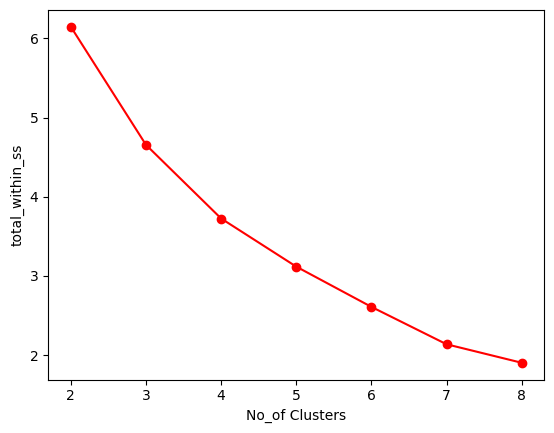

In [47]:
plt.plot(k,TWSS,'ro-');plt.xlabel("No_of Clusters");plt.ylabel("total_within_ss")

In [52]:
pip install kneed


  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


<h1> Using Knee Locator </h1>

C:\Users\Meghna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Meghna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Meghna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Meghna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

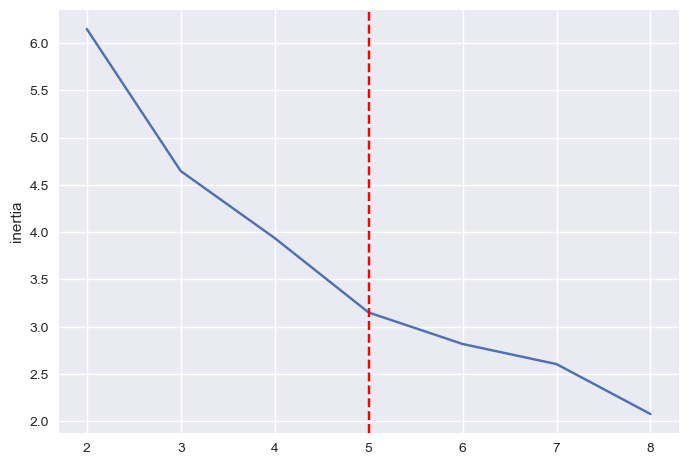

In [58]:
List = []

for k in range(2,9):
    kmeans = KMeans(n_clusters=k, init= "random", max_iter = 30, random_state = 1, n_init =10)
    kmeans.fit(univ1)
    List.append(kmeans.inertia_)

from kneed import KneeLocator
kl = KneeLocator(range(2,9), List, curve='convex',direction='decreasing')
kl.elbow
plt.style.use("seaborn")
plt.plot(range(2,9),List)
plt.xticks(range(2,9))
plt.ylabel("inertia")
plt.axvline(x=kl.elbow, color='r', label='axvline - full height' , ls= '--')
plt.show()

In [56]:
model = KMeans(n_clusters = 5)
yy = model.fit(univ1)

C:\Users\Meghna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Meghna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [57]:
model.labels_

array([1, 3, 0, 1, 1, 1, 1, 4, 3, 3, 3, 4, 4, 2, 1, 2, 3, 2, 4, 4, 0, 1,
       0, 2, 3])

In [59]:
mb = pd.Series(model.labels_)

In [60]:
df['clust'] = mb

In [61]:
df.head()

,UnivID,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,1,Brown,RI,1310.0,89,22,13.0,22704,94.0,1
1,2,CalTech,CA,1415.0,100,25,6.0,63575,81.0,3
2,3,CMU,PA,1260.0,62,59,9.0,25026,72.0,0
3,4,Columbia,NY,1310.0,76,24,12.0,31510,NaN,1
4,5,Cornell,NY,1280.0,83,33,13.0,21864,90.0,1


In [62]:
x = df.iloc[:,3:].values

<h1> 3D Scatter Plot </h1>

<IPython.core.display.Javascript object>


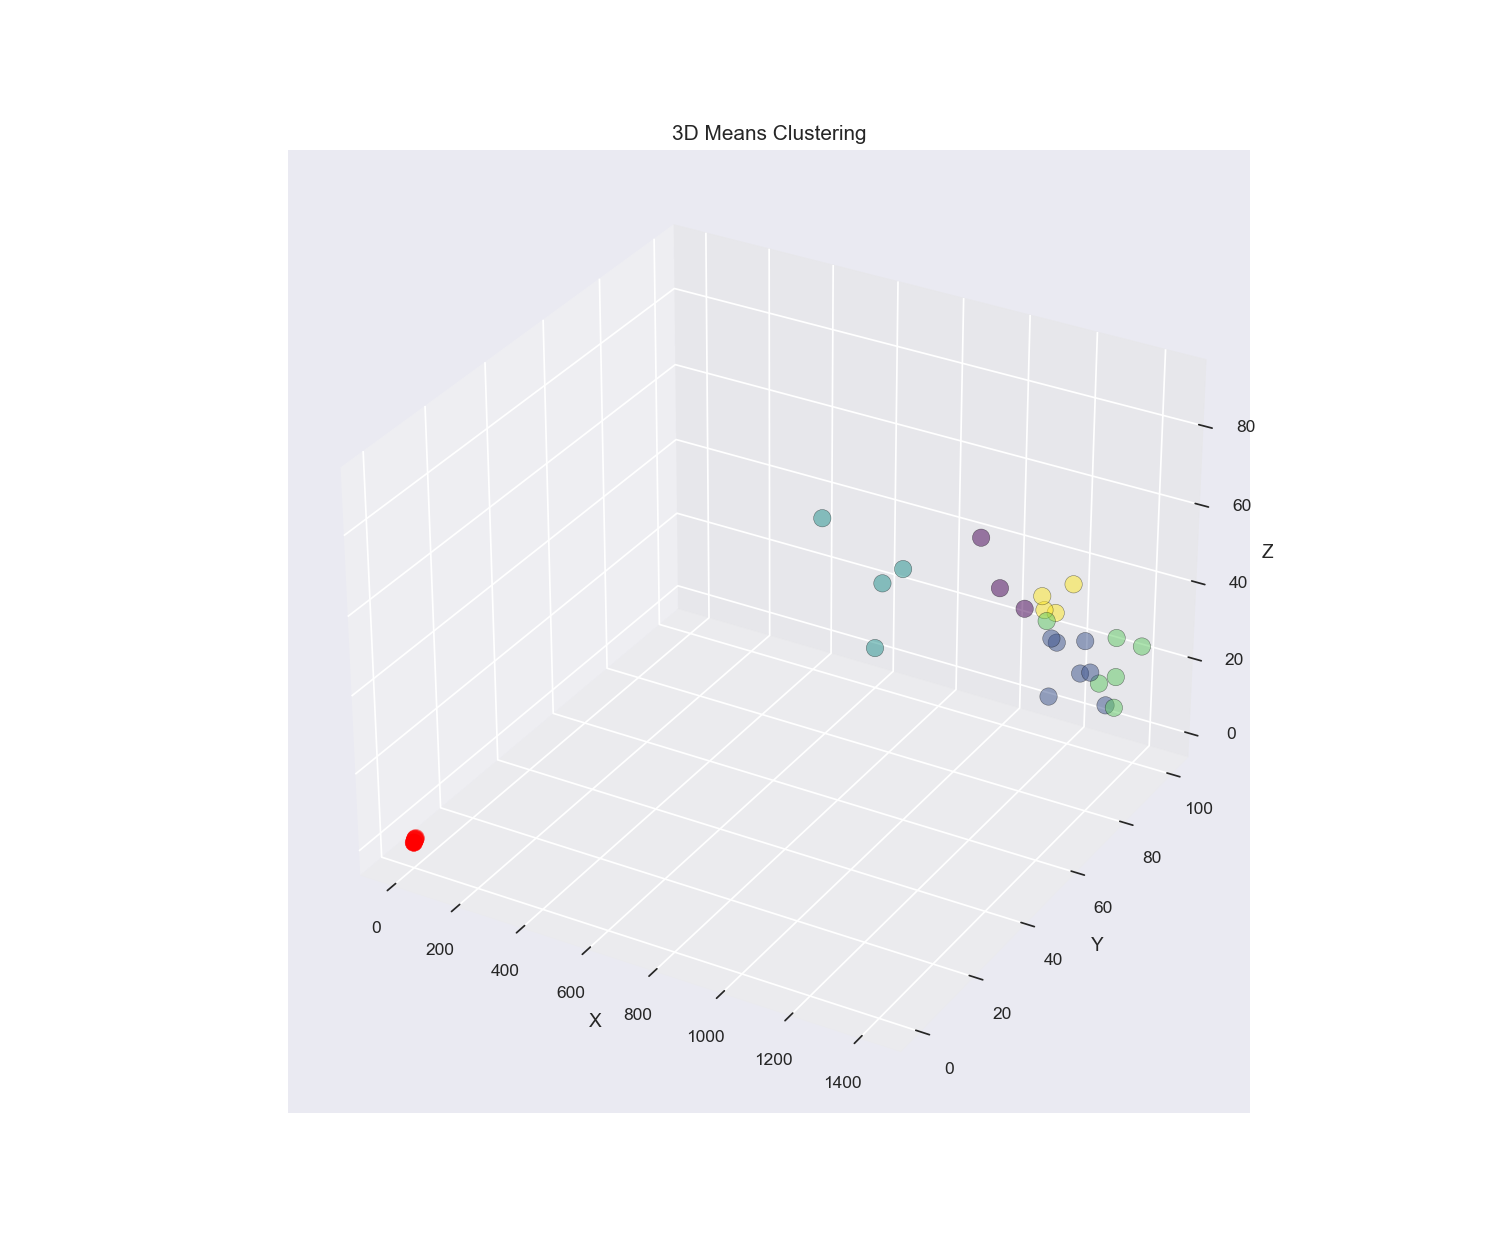

<function matplotlib.pyplot.show(*, block=None)>

In [64]:
%matplotlib notebook
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(x[:,0],x[:,1],x[:,2],c=model.labels_,cmap='viridis',marker='o',edgecolor='k',s=100,alpha = 0.5)
ax.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],model.cluster_centers_[:,2], s = 100, c = 'r',marker = 'o',label = 'Centroid')
ax.set_title("3D Means Clustering")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show